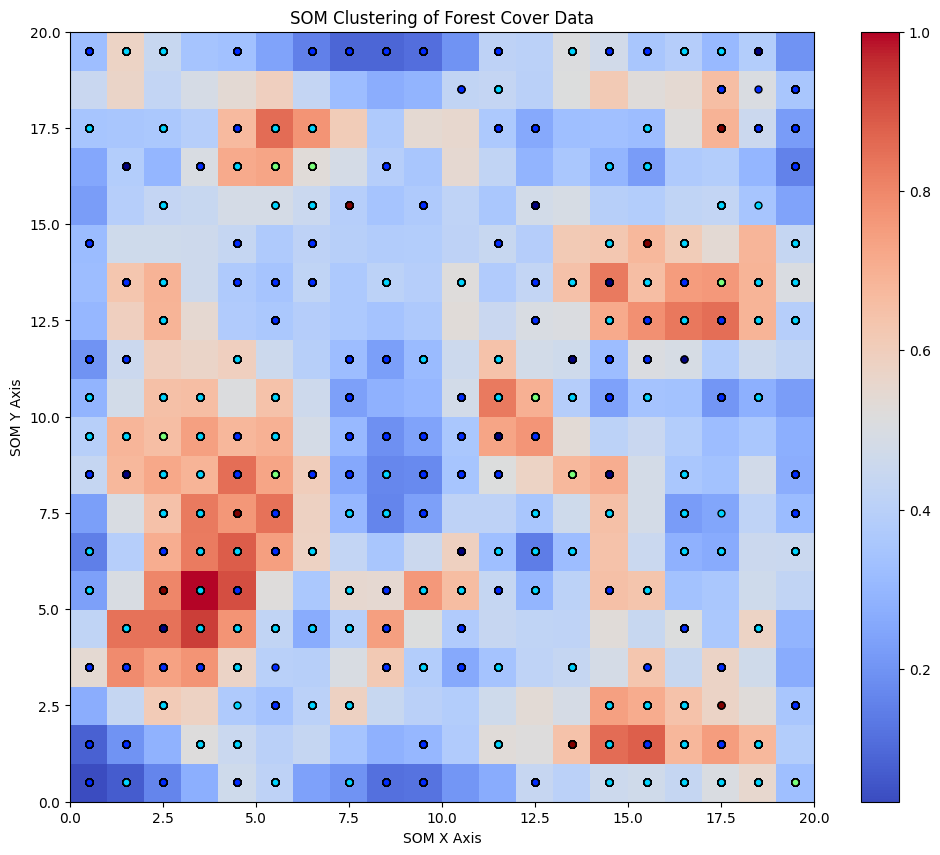

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Lokesh/Desktop/BDA/forest/covtype.csv') 
features = df.drop(columns=['Cover_Type'])

scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
som = MiniSom(x=20, y=20, input_len=features_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(features_normalized)
som.train_random(features_normalized, 1000) 
plt.figure(figsize=(12, 10))
plt.pcolor(som.distance_map().T, cmap='coolwarm') 
plt.colorbar()

cover_types = df['Cover_Type']
unique_cover_types = cover_types.unique()
color_map = plt.get_cmap('jet', len(unique_cover_types))

for i, x in enumerate(features_normalized):
    w = som.winner(x) 
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', 
             markerfacecolor=color_map(cover_types.iloc[i] % len(unique_cover_types)), 
             markeredgecolor='black', markersize=5)

plt.title('SOM Clustering of Forest Cover Data')
plt.xlabel('SOM X Axis')
plt.ylabel('SOM Y Axis')
plt.grid(False) 
plt.show() 


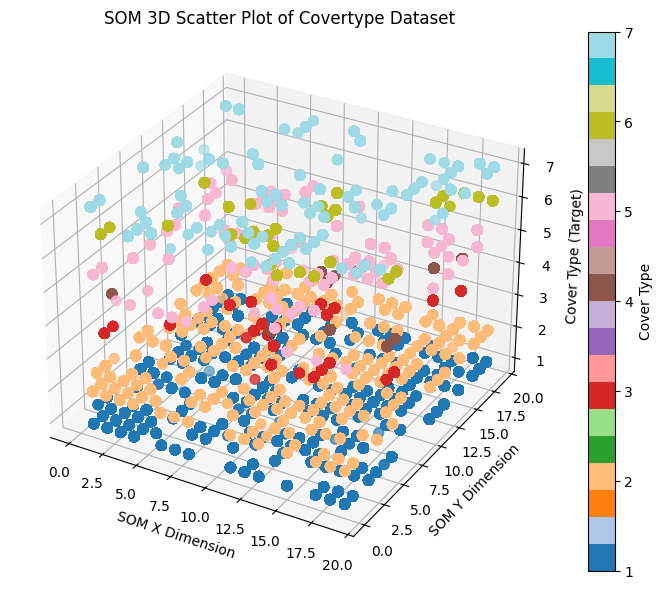

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_covertype = pd.read_csv('C:/Users/Lokesh/Desktop/BDA/forest/covtype.csv') 
X_covertype = df_covertype.drop(columns=['Cover_Type'])  
y_covertype = df_covertype['Cover_Type']             

scaler = MinMaxScaler()
features_normalized_covertype = scaler.fit_transform(X_covertype)

som_covertype = MiniSom(x=20, y=20, input_len=features_normalized_covertype.shape[1], sigma=1.0, learning_rate=0.5)
som_covertype.random_weights_init(features_normalized_covertype)
som_covertype.train_random(features_normalized_covertype, 2000)

mapped_data = np.array([som_covertype.winner(x) for x in features_normalized_covertype])

som_x = mapped_data[:, 0]
som_y = mapped_data[:, 1]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(som_x, som_y, y_covertype, c=y_covertype, cmap='tab20', s=50)

ax.set_xlabel('SOM X Dimension')
ax.set_ylabel('SOM Y Dimension')
ax.set_zlabel('Cover Type (Target)')

legend = plt.colorbar(scatter)
legend.set_label('Cover Type')

plt.title('SOM 3D Scatter Plot of Covertype Dataset')
plt.show()



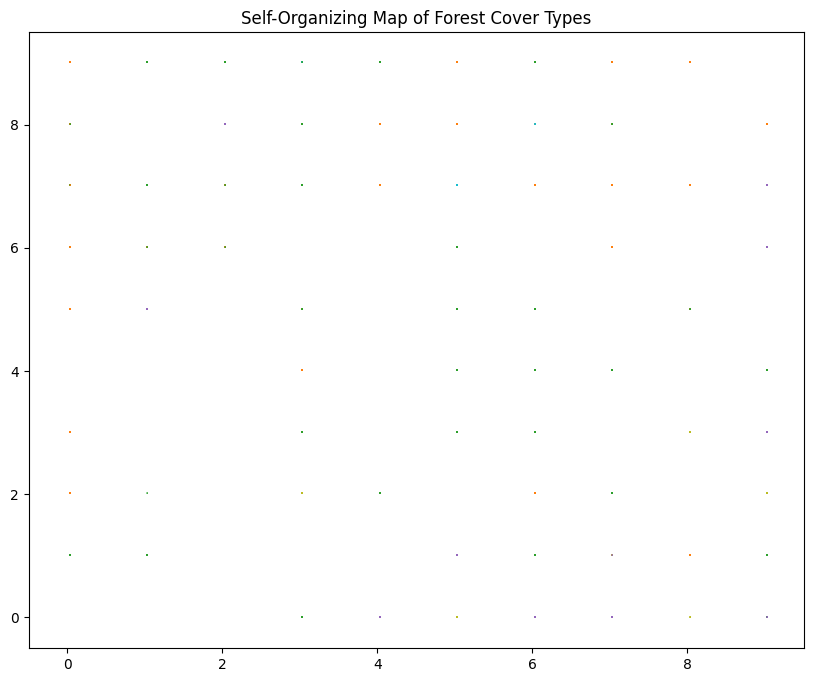

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom

# Load the dataset
data = pd.read_csv('C:/Users/Lokesh/Desktop/BDA/forest/covtype.csv')  # Replace with your dataset path

# Preprocess the data
X = data.drop(columns=['Cover_Type']).values  # Drop the target variable
y = data['Cover_Type'].values  # Store the target variable for later use

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the dimensions of the SOM
som_size = 10  # Adjust this size
som = MiniSom(som_size, som_size, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train(X_scaled, num_iteration=1000)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.title('Self-Organizing Map of Forest Cover Types')
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Get the winning node
    plt.text(w[0], w[1], '.', color=plt.cm.tab10(y[i] / 7), fontsize=10)  # Color based on cover type
plt.xlim(-0.5, som_size - 0.5)
plt.ylim(-0.5, som_size - 0.5)
plt.show()